<font size ="8"> <div align="center">**Hospital Length of Stay Prediction using Statistical Linear Models**</div></font>
<font size ="5"> <div align="center">By **Jon Nyner Gavan**</div></font>

---
# **Context of the Case Study (Hospital LOS)**
---
<p align = "justify">
Hospital management is a vital area that gained a lot of attention during the COVID-19 pandemic. <b>Inefficient distribution of resources like beds, ventilators might lead to a lot of complications</b>. However, this can be mitigated by <b>predicting the length of stay (LOS) of a patient before getting admitted</b>. Once this is determined, the hospital can plan a suitable treatment, resources, and staff to reduce the LOS and increase the chances of recovery. The rooms and bed can also be planned in accordance with that.

<p align = "justify">
<b>HealthPlus hospital has been incurring a lot of losses in revenue and life due to its inefficient management system.</b> They have been unsuccessful in allocating pieces of equipment, beds, and hospital staff fairly. <b>A system that could estimate the length of stay (LOS) of a patient can solve this problem to a great extent.</b>

<p align = "justify">
As a Data Scientist, suppose you have been hired by HealthPlus to analyze the data, find out <b>what factors affect the LOS the most, and come up with a machine learning model which can predict the LOS of a patient</b> using the data available during admission and after running a few tests. Also, <b>bring about useful insights and policies from the data, which can help the hospital to improve their health care infrastructure and revenue.</b>

---
## **Data Description**
---
<p align = "justify">
The data contains various information recorded during the time of admission of the patient. It only contains <b>records of patients who were admitted to the hospital.</b> The detailed data dictionary is given below:


* **patientid**: Patient ID
* **Age**: Range of age of the patient
* **gender**: Gender of the patient
* **Type of Admission**: Trauma, emergency or urgent
* **Severity of Illness**: Extreme, moderate, or minor
* **health_condition**s: Any previous health conditions suffered by the patient
* **Visitors with Patient**: The number of patients who accompany the patient
* **Insurance**: Does the patient have health insurance or not?
* **Admission_Deposit**: The deposit paid by the patient during admission
* **Stay (in days)**: The number of days that the patient has stayed in the hospital. This is the **target variable**
* **Available Extra Rooms in Hospital**: The number of rooms available during admission
* **Department**: The department which will be treating the patient
* **Ward_Facility_Code**: The code of the ward facility in which the patient will be admitted
* **doctor_name**: The doctor who will be treating the patient
* **staff_available**: The number of staff who are not occupied at the moment in the ward
---
## **Objectives of the Study**
---
<p align = "justify">
The main goal of this study is to thoroughly explore the Hospital Dataset and extract useful insights for the the supposed Hospital's management. As an additional exercise, the substantial size of the data is enough to train machine learning models that can predict a target variable. In light of this, different linear models will be trained using python libraries, and their performance will be evaluated and compared against one another

### **Part 1. Importing Libraries and Data Overview**

**Importing Libaries and Loading the Data**

In [1]:
# Importing Pertinent Libraries and Packages

# Libraries for Data Manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Auxiliary settings
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)  # Removes the limit for the number of displayed columns
pd.set_option("display.max_rows", 200)      # Sets the limit for the number of displayed rows

# To build models for prediction
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

# To encode categorical variables
from sklearn.preprocessing import LabelEncoder

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To check model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

In [2]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Read the healthcare dataset file
data = pd.read_csv("/content/drive/MyDrive/Classroom/Data Science/MIT Summer School/4 Supervised Learning - Regression and Prediction/1 Practice Case Studies/1 Linear Models/Dataset - Healthcare data.csv")

In [3]:
# Copying data to another variable to avoid any changes to original data
data2 = data.copy()

**Quick look at the first and last few rows of the Data**

In [5]:
# Viewing the first 5 rows of the dataset
data2.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,NaN,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


In [6]:
# View the last 5 rows of the dataset
data2.tail()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
499995,4,gynecology,F,Dr Sarah,2,43001,11-20,Female,Trauma,Minor,High Blood Pressure,3,No,4105.795901,10
499996,13,gynecology,F,Dr Olivia,8,85601,31-40,Female,Emergency,Moderate,Other,2,No,4631.550257,11
499997,2,gynecology,B,Dr Sarah,3,22447,11-20,Female,Emergency,Moderate,High Blood Pressure,2,No,5456.930075,8
499998,2,radiotherapy,A,Dr John,1,29957,61-70,Female,Trauma,Extreme,Diabetes,2,No,4694.127772,23
499999,3,gynecology,F,Dr Sophia,3,45008,41-50,Female,Trauma,Moderate,Heart disease,4,Yes,4713.868519,10


**Understanding the shape of the data and its datatypes**

In [11]:
# Viewing the number of rows and columns
data2.shape

(500000, 15)

- The dataset has **500,000 rows and 15 columns.**

In [12]:
# Checking the info of the data
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  500000 non-null  int64  
 1   Department                         500000 non-null  object 
 2   Ward_Facility_Code                 500000 non-null  object 
 3   doctor_name                        500000 non-null  object 
 4   staff_available                    500000 non-null  int64  
 5   patientid                          500000 non-null  int64  
 6   Age                                500000 non-null  object 
 7   gender                             500000 non-null  object 
 8   Type of Admission                  500000 non-null  object 
 9   Severity of Illness                500000 non-null  object 
 10  health_conditions                  348112 non-null  object 
 11  Visitors with Patient              5000

-  Available Extra Rooms in Hospital, staff_available, patientid, Visitors with Patient, Admission_Deposit, and Stay (in days) are of **numeric data type** and the rest of the columns are of **object data type**.
- The number of non-null values is the same as the total number of entries in the data, i.e., **there are no null values.**
- The column patientid is an identifier for patients in the data. This column will not help with our analysis so we can drop it.

**Closer look at `patientid` column**

In [4]:
# To view patientid and the number of times they have been admitted to the hospital
data2['patientid'].value_counts()

,count
patientid,
44572,21
125695,21
126623,21
126719,21
125664,19
...,...
53872,1
121277,1
97293,1


- **The maximum number of times the same patient admitted to the hospital is 21 and minimum is 1.**

In [5]:
# Dropping patientid from the data as it is an identifier and will not add value to the analysis
data2=data.drop(columns=["patientid"])

**Checking for Duplicated Data**

In [6]:
# Checking for duplicate values in the data
data2.duplicated().sum()

np.int64(0)

- Data contains unique rows. There is no need to remove any rows.

### **Part 2. Exploratory Data Anlaysis**

#### **Preliminary Analysis of Data Columns**

*Looking at the Numerical Columns*

In [9]:
# Checking the descriptive statistics of numerical columns
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
Available Extra Rooms in Hospital,500000.0,3.638800,2.698124,0.000000,2.000000,3.000000,4.000000,24.00000
staff_available,500000.0,5.020470,3.158103,0.000000,2.000000,5.000000,8.000000,10.00000
Visitors with Patient,500000.0,3.549414,2.241054,0.000000,2.000000,3.000000,4.000000,32.00000
Admission_Deposit,500000.0,4722.315734,1047.324220,1654.005148,4071.714532,4627.003792,5091.612717,10104.72639
Stay (in days),500000.0,12.381062,7.913174,3.000000,8.000000,9.000000,11.000000,51.00000


* There are around **3 rooms available in the hospital on average** and there are times when the hospital is full and there are no rooms available (minimum value is 0). The **maximum number of rooms available in the hospital is 24**.
* **On average, there are around 5 staff personnel available to treat the new patients** but it can also be zero at times. The maximum number of staff available in the hospital is 10.
* **On average, around 3 visitors accompany the patient.** Some patients come on their own (minimum value is zero) and a few cases have 32 visitors. It will be interesting to see if there is any relationship between the number of visitors and the severity of the patient.
* **The average admission deposit lies around 4,722 dollars and a minimum of 1,654 dollars is paid on every admission.**
* **Patient's stay ranges from 3 to 51 days.** There might be outliers in this variable. The median length of stay is 9 days.

*Looking at Categorical Columns*

In [17]:
# List of all important categorical variables
cat_col = ["Department", "Type of Admission", 'Severity of Illness', 'gender', 'Insurance', 'health_conditions', 'doctor_name', "Ward_Facility_Code", "Age"]

# Printing the normalized number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(data2[column].value_counts(1))
    print("-" * 50)

Department
gynecology            0.686956
radiotherapy          0.168630
anesthesia            0.088358
TB & Chest disease    0.045780
surgery               0.010276
Name: proportion, dtype: float64
--------------------------------------------------
Type of Admission
Trauma       0.621072
Emergency    0.271568
Urgent       0.107360
Name: proportion, dtype: float64
--------------------------------------------------
Severity of Illness
Moderate    0.560394
Minor       0.263074
Extreme     0.176532
Name: proportion, dtype: float64
--------------------------------------------------
gender
Female    0.74162
Male      0.20696
Other     0.05142
Name: proportion, dtype: float64
--------------------------------------------------
Insurance
Yes    0.78592
No     0.21408
Name: proportion, dtype: float64
--------------------------------------------------
health_conditions
Other                  0.271209
High Blood Pressure    0.228093
Diabetes               0.211553
Asthama                0.188198


- **The majority of patients (~82%) admit to the hospital with moderate and minor illness**, which is understandable as extreme illness is less frequent than moderate and minor illness.
- **Gynecology department gets the most number of patients (~68%)** in the hospital, whereas patients in Surgery department are very few (~1%).
- **Ward A and C accommodate the least number of patients (~12%).** These might be wards reserved for patient with extreme illness and patients who need surgery. It would be interesting to see if patients from these wards also stay for longer duration.
- The majority of patients belong to the age group of 21-50 (~75%),
- **The majority of patients are women (~74%).** The most number of patients in the gynecology department of the hospital can justify this.
- Most of the patients admitted to the hospital are the cases of trauma (~62%).
- After 'Other' category, **High Blood Pressure and Diabetes are the most common health conditions.**

#### **Univariate Analysis**

*Defining a useful plotting function for viewing Distributions of Numerical Data*

In [18]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram

*Looking at Length of stay*

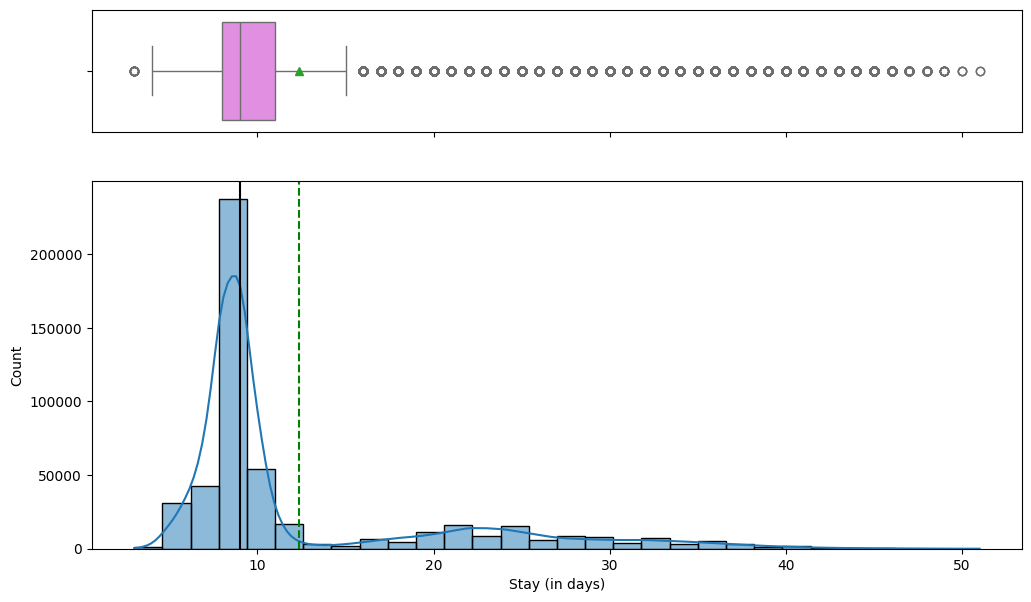

In [19]:
# Applying the plotting function on `Stay (in days)` column
histogram_boxplot(data2, "Stay (in days)", kde = True, bins = 30)

- **Fewer patients are staying more than 10 days in the hospital and very few stay for more than 40 days**. This might be because the majority of patients are admitted for moderate or minor illnesses.
- The peak of the distribution shows that **most of the patients stay for 8-9 days in the hospital.**

*Looking at Admission Deposit*

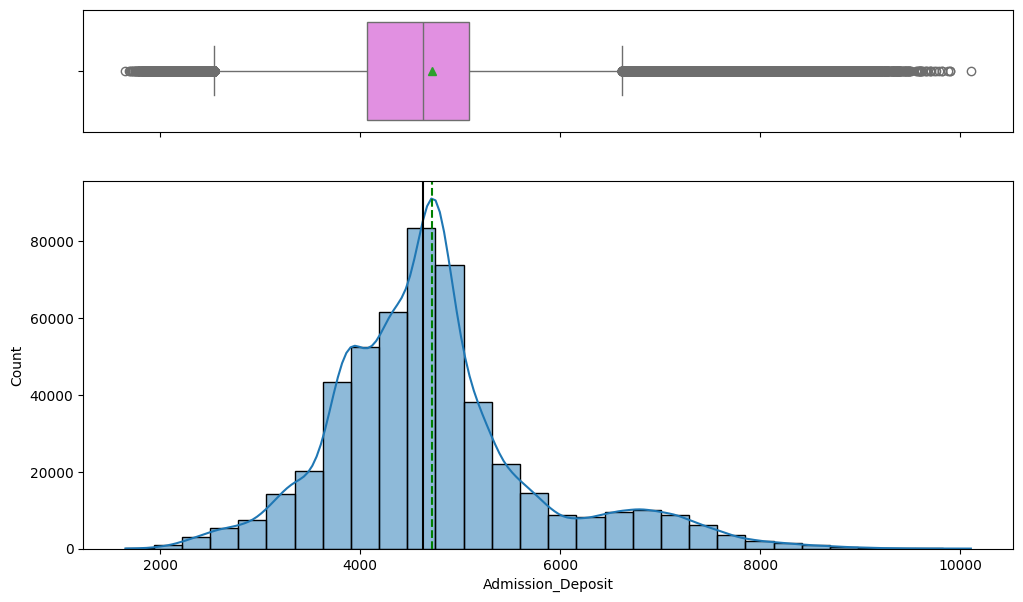

In [20]:
# Applying the plotting function on `ADmission_Deposit` column
histogram_boxplot(data2, "Admission_Deposit", kde = True, bins = 30)

- The **distribution of admission fees is close to normal with outliers on both sides**. Few patients are paying a high amount of admission fees and few patients are paying a low amount of admission fees.

*Looking at Visitors with Patients*

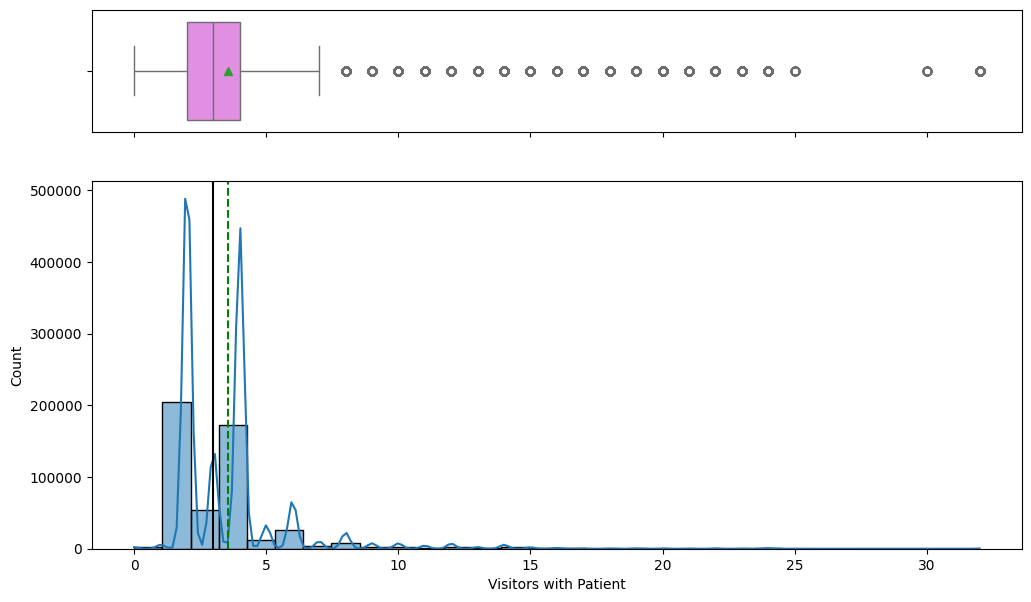

In [21]:
# Applying the plotting function on `Visitors with Patient` column
histogram_boxplot(data2, "Visitors with Patient", kde = True, bins = 30)

- The distribution of the number of visitors with the patient is **highly skewed towards the right**.
- **2 and 4 are the most common number of visitors with patients.**

#### **Bivariate Analysis**

*Investigating correlations between numerical data*

<Axes: >

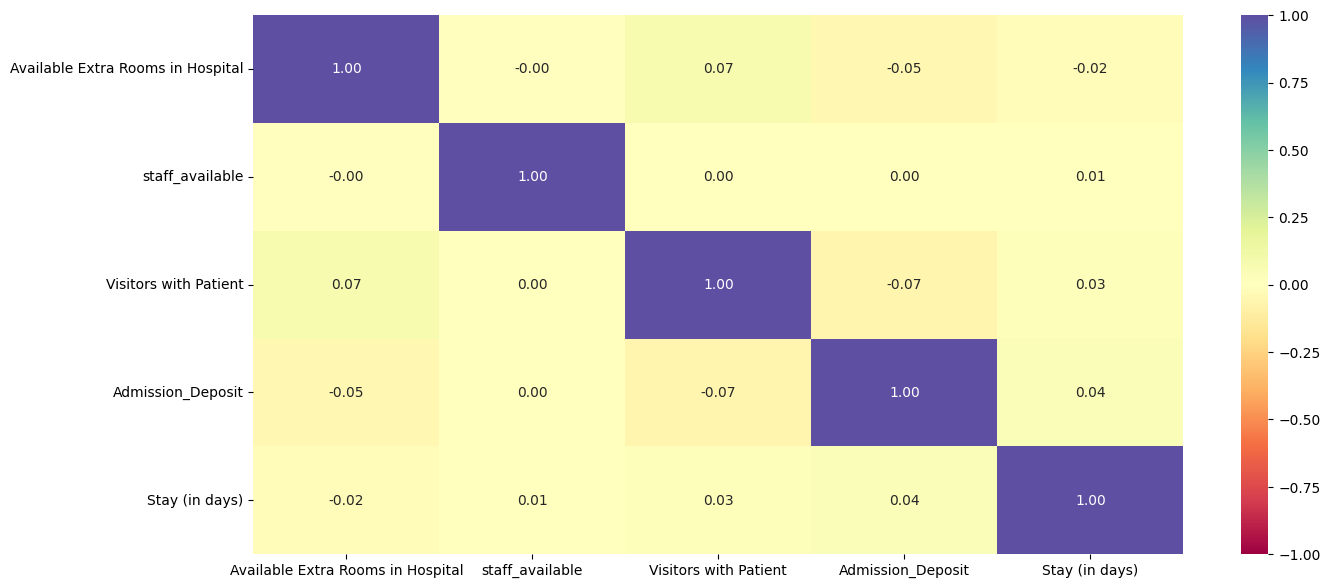

In [22]:
# Finding the correlation between various columns of the dataset
plt.figure(figsize = (15,7))
sns.heatmap(data2[['Available Extra Rooms in Hospital', 'staff_available', 'Visitors with Patient', 'Admission_Deposit', 'Stay (in days)']].corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral")

- The heatmap shows that there is **no correlation between variables**.
- The continuous variables show no correlation with the target variable (Stay (in days)), which indicates that the **categorical variables might be more important for the prediction.**

*Defining a useful plotting function to display datapoint distributions across categories*

In [23]:
# Function to plot stacked bar plots

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins = True).sort_values(
        by = sorter, ascending = False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize = "index").sort_values(
        by = sorter, ascending = False
    )
    tab.plot(kind = "bar", stacked = True, figsize = (count + 1, 5))
    plt.legend(
        loc = "lower left",
        frameon = False,
    )
    plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))
    plt.show()

*Checking the distribution of the LOS for the various wards*

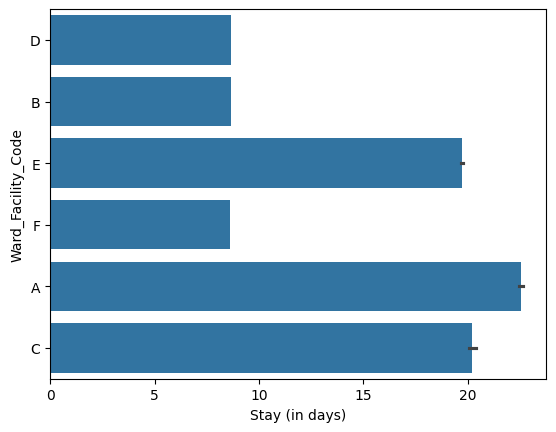

In [24]:
# Applying plotting function to check LOS across different ward facilities
sns.barplot(y = 'Ward_Facility_Code', x = 'Stay (in days)', data = data2)
plt.show()

- The hypothesis we made earlier is correct, i.e., **wards A and C has the patients staying for the longest duration, which implies these wards might be for patients with serious illnesses.**

Department          TB & Chest disease  anesthesia  gynecology  radiotherapy  \
Ward_Facility_Code                                                             
A                                 4709       15611           0         21093   
All                              22890       44179      343478         84315   
B                                    0           0      103885             0   
C                                 1319        4199           0          9079   
D                                    0           0      119055             0   
E                                16862       24369           0         54143   
F                                    0           0      120538             0   

Department          surgery     All  
Ward_Facility_Code                   
A                      5138   46551  
All                    5138  500000  
B                         0  103885  
C                         0   14597  
D                         0  119055  
E            

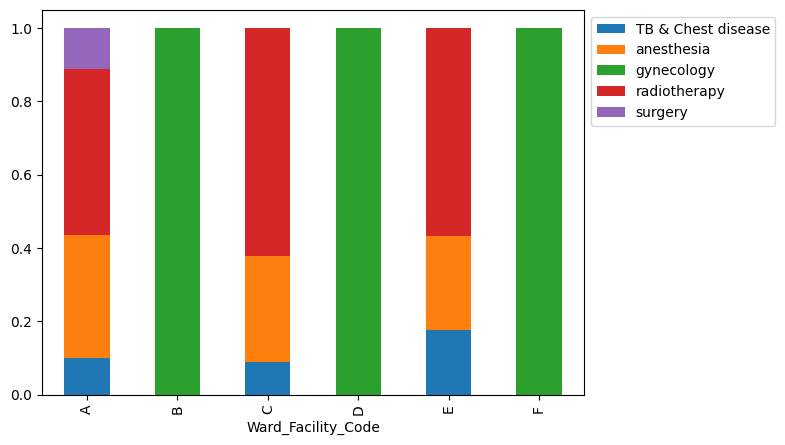

In [25]:
# Applying plotting function to check different ward facilities across handling Departments
stacked_barplot(data2, "Ward_Facility_Code", "Department")

- **Ward Facility B, D, and F are dedicated only to the gynecology department.**
- Wards A, C, and E have patients with all other diseases, and **patients undergoing surgery are admitted to ward A only.**

*Checking different Illness severities spread across different ward facilities*

Severity of Illness  Extreme   Minor  Moderate     All
Ward_Facility_Code                                    
All                    88266  131537    280197  500000
D                      29549   27220     62286  119055
B                      24222   23579     56084  103885
A                      13662    7877     25012   46551
E                      11488   22254     61632   95374
F                       5842   47594     67102  120538
C                       3503    3013      8081   14597
------------------------------------------------------------------------------------------------------------------------


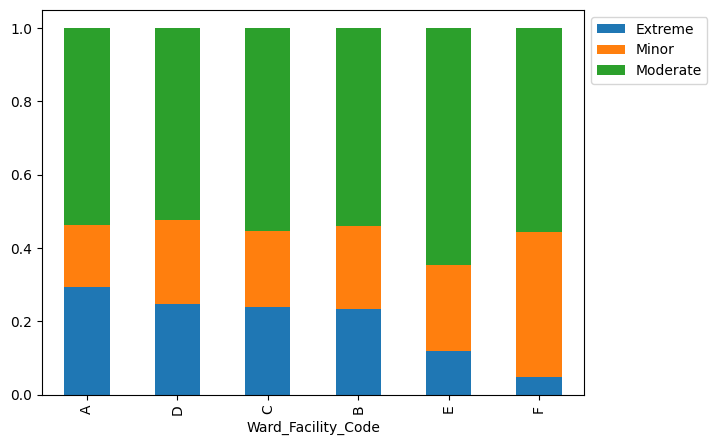

In [26]:
# Applying plotting function to check Illness severities across different ward facilities
stacked_barplot(data2, "Ward_Facility_Code", "Severity of Illness")

- **Ward A has the highest number of extreme cases.** We observed earlier that ward A has the longest length of stay in the hospital as well. It might require more staff and resources as compared to other wards.
- **Ward F has the highest number of minor cases and Ward E has the highest number of moderate cases.**

*Checking Age profiles and LOS*

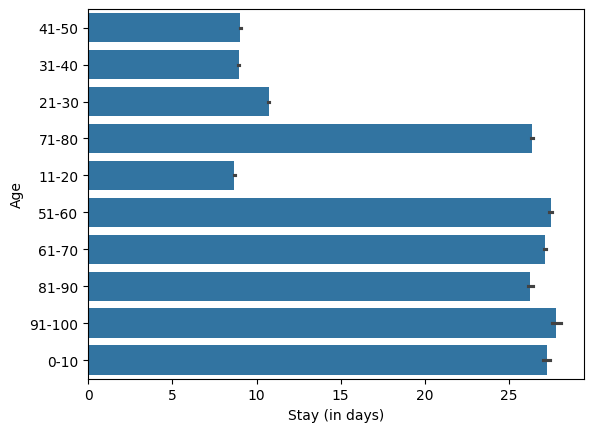

In [27]:
# Applying plotting function to check LOS across patient age groups
sns.barplot(y = 'Age', x = 'Stay (in days)', data = data2)
plt.show()

- **Patients aged between 1-10 and 51-100 tend to stay the most number of days in the hospital.** This might be because the majority of the patients between the 21-50 age group get admitted to the gynecology department and patients in age groups 1-10 and 5-100 might get admitted due to some serious illness.

*Checking doctors, their department names, and the total number of patients they have treated*

In [28]:
# Grouping patient data according to attending doctors
data2.groupby(['doctor_name'])['Department'].agg(Department_Name='unique',Patients_Treated='count')

,Department_Name,Patients_Treated
doctor_name,,
Dr Isaac,[surgery],3359
Dr John,"[TB & Chest disease, anesthesia, radiotherapy]",51263
Dr Mark,"[anesthesia, TB & Chest disease]",44410
Dr Nathan,[gynecology],70777
Dr Olivia,[gynecology],98352
Dr Sam,[radiotherapy],55711
Dr Sarah,[gynecology],99596
Dr Simon,[surgery],1779
Dr Sophia,[gynecology],74753


**Observations:**

- The hospital employs a total of 9 doctors. Four of the doctors work in the department of gynecology, which sees the most patients.
- The majority of patients that attended the hospital were treated by Dr. Sarah and Olivia.
- Two doctors are working in the surgical department (Dr. Isaac and Dr. Simon), while Dr. Sam works in the radiotherapy department.
- The only two doctors who work in several departments are Dr. John and Dr. Mark.

### **Part 3. Data Preparation for Model Building**

Before proceeding to model building:
- categorical variables need to be encoded.
- independent variables and dependent Variables need to be separated.
- data needs to be split into training and testing data

*Encoding the Categorical Features*

In [7]:
# Creating dummy variables for the categorical columns
# drop_first=True is used to avoid redundant variables

data2 = pd.get_dummies(
    data,
    columns = data.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
    dtype = float
)

In [8]:
# Check the data after handling categorical data
data2.head()

,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit,Stay (in days),Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,doctor_name_Dr John,doctor_name_Dr Mark,doctor_name_Dr Nathan,doctor_name_Dr Olivia,doctor_name_Dr Sam,doctor_name_Dr Sarah,doctor_name_Dr Simon,doctor_name_Dr Sophia,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100,gender_Male,gender_Other,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Minor,Severity of Illness_Moderate,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_Other,Insurance_Yes
0,4,0,33070,4,2966.408696,8,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,4,2,34808,2,3554.835677,9,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,8,44577,2,5624.733654,7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,4,7,3695,4,4814.149231,8,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2,10,108956,2,5169.269637,34,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


* From the glimpse of the table above, it is seen that each of the categorical columns have had their corresponding unique values extracted and made as new columns containing either `0`, or `1`
* Encoded categorical columns with `1` entries mean that a particular datapoint falls into that category

*Defining dependent and independent variables*

In [9]:
# Separating independent variables and the target variable
x = data2.drop('Stay (in days)',axis=1)    # Length of Stay (in days) will be the dependent
y = data2['Stay (in days)']                # This column will be saved as to variable y

*Splitting data into training and testing*

In [10]:
# Splitting the dataset into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 1)

In [11]:
# Checking the shape of the train and test data
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)

Shape of Training set :  (400000, 42)
Shape of test set :  (100000, 42)


* From above, it is seen that the datapoints are composed of 42 features/columns that will serve as independent variables or predictors for the set dependent variabl
* The initial 500k data points are divided into 400k training data and 100k testing data

### **Part 4. Statistical Model Building**

* Different metrics functions defined in sklearn like RMSE, MAE, 𝑅2, Adjusted 𝑅2, and MAPE will be used for regression models evaluation. A function  will be defined to calculate these metric.
* The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average of absolute percentage error for all data points. The absolute percentage error is defined as predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.

In [12]:
# Defining useful functions for model performance evaluation

# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors)                  # Predict using the independent variables
    r2 = r2_score(target, pred)                       # To compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)    # To compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # To compute RMSE
    mae = mean_absolute_error(target, pred)           # To compute MAE
    mape = mape_score(target, pred)                   # To compute MAPE

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

#### **Training a Model using Statsmode.api Library**

In [13]:
# Building Models from statsmodels
import statsmodels.api as sm

# Statsmodel API does not add a constant by default. We need to add it explicitly.
x_train1 = sm.add_constant(x_train)

# Add constant to test data
x_test1 = sm.add_constant(x_test)

# Train the model
olsmodel1 = sm.OLS(y_train, x_train1).fit()

# Get the model summary
olsmodel1.summary()
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:         Stay (in days)   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                 5.643e+04
Date:                Mon, 05 May 2025   Prob (F-statistic):               0.00
Time:                        08:23:49   Log-Likelihood:            -1.0246e+06
No. Observations:              400000   AIC:                         2.049e+06
Df Residuals:                  399961   BIC:                         2.050e+06
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

*Checking the Performance of the Model*

In [14]:
# Checking the performance of the Statistical Model Trained using statsmodel.api library
lin_reg_test = model_performance_regression(olsmodel1, x_test1, y_test)
lin_reg_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.144054,2.155765,0.843028,0.842961,19.676967


- We can observe that `R-squared` for the model is `~0.84`.
- Not all the variables are statistically significant enough to predict the outcome variable. To check which ones are statistically significant or have enough predictive power to predict the target variable, we check the `p-value` for all the independent variables. Independent variables with a p-value of higher than 0.05 are not significant for the 95% confidence level.

*Interpreting the Regression Results:*

1. **Adjusted R-squared**: It reflects the fit of the model.
    - R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for Adj. R-squared is **0.84**

2. **coef**: It represents the change in the output Y due to a change of one unit in the variable (everything else held constant).
3. **std err**: It reflects the level of accuracy of the coefficients.
    - The lower it is, the more accurate the coefficients are.
4. **P > | t |**  The p-value:
   
   * Pr(>|t|): For each independent feature there is a null hypothesis and an alternate hypothesis

    **Ho:** Null Hypothesis - The independent feature is not significant
   
    **Ha:** Alternate Hypothesis - The independent feature is significant
    
   * A p-value of less than 0.05 is considered to be statistically significant.

   
5. **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).



* Both the **R-squared and Adjusted R-squared of the model are around 84%**. This is a clear indication that we have been able to create a good model that can explain variance in the LOS of patients for up to 84%.

* We can examine the significance of the regression model, and try dropping insignificant variables.

In [15]:
# Checking the models performance on the training data
print("Performance on train data: ")
model_performance_regression(olsmodel1, x_train1, y_train)

Performance on train data: 


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.135093,2.146243,0.842813,0.842796,19.591828


In [16]:
# Checking hte model's performance on the test data
print("Performance on test data: ")
model_performance_regression(olsmodel1, x_test1, y_test)

Performance on test data: 


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.144054,2.155765,0.843028,0.842961,19.676967


**Observations:**

- **The Root Mean Squared Error** of train and test data are **very close**, indicating that **our model is not overfitting** to the training data.

- Mean Absolute Error (MAE) indicates that the current model can predict LOS of patients within **mean error of 2.15 days** on the test data.

- The units of both RMSE and MAE are the same - days in this case. But RMSE is greater than MAE because it penalizes the outliers more.

- **Mean Absolute Percentage Error is ~19%** on the test data, indicating that the average difference between the predicted value and the actual value is ~19%.

#### **Checking for Multicollinearity**

**Multicollinearity** occurs when **independent variables** in a regression model are **highly correlated** to each other, such that they do not provide **unique** or independent information.

**Variation Inflation Factor (VIF)** is one of the most common ways of detecting multicollinearity in data. It calculates how much the variance of a regression coefficient is inflated due to model multicollinearity.

Variance inflation factor (VIFs) tells **"what percentage of the variance is inflated for each coefficient"**. For example, a VIF of 1.7 tells you that the variance of a particular coefficient is 70% bigger than what you would expect if there was no multicollinearity, i.e., if there was no correlation with other predictors.

Usually, features having a VIF score greater than 5 are dropped/treated till all the features have a VIF score of less than 5.

In [17]:
# Defining a function that checks the variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


In [21]:
# Showing the Variation Inflation Factors of the Features
print(checking_vif(x_train1))

                                  feature        VIF
0                                   const   0.000000
1       Available Extra Rooms in Hospital   1.023195
2                         staff_available   1.001928
3                               patientid   1.002524
4                   Visitors with Patient   1.029234
5                       Admission_Deposit   1.021145
6                   Department_anesthesia   2.737453
7                   Department_gynecology        inf
8                 Department_radiotherapy   7.650935
9                      Department_surgery        inf
10                   Ward_Facility_Code_B        inf
11                   Ward_Facility_Code_C   1.367340
12                   Ward_Facility_Code_D        inf
13                   Ward_Facility_Code_E   2.879024
14                   Ward_Facility_Code_F        inf
15                    doctor_name_Dr John        inf
16                    doctor_name_Dr Mark        inf
17                  doctor_name_Dr Nathan     

- All the continuous variables have VIF less than 5, which makes sense according to what we observed in correlation heatmap.

**Note:** It is not a good practice to consider VIF values for dummy variables as they are correlated to other categories and hence have a high VIF usually. In such a case, we can check the p-values of coefficients.

#### **Dropping the insignificant variables and creating the regression model again**

*Examining the significance of the model and dropping variables*

It is not enough to just fit a multiple regression model to the data, it is also necessary to check whether all the regression coefficients are significant or not. The significance here means whether the population regression parameters are significantly different from zero.

From the above, it may be noted that the regression coefficients corresponding to staff_available, Visitors with Patient, and Insurance_Yes **are not statistically significant at significance level α = 0.05.** In other words, the regression coefficients corresponding to these three are not significantly different from 0 in the population.

If all the categories in a column show p-value higher than 0.05, then we can drop that column. **Hence, we will eliminate these three features and create a new model.**

In [18]:
# Dropping variables
x_train2 = x_train1.drop(['Insurance_Yes','staff_available','Visitors with Patient'], axis = 1)
x_test2 = x_test1.drop(['Insurance_Yes','staff_available','Visitors with Patient'], axis = 1)

# Train the model
olsmodel2 = sm.OLS(y_train, x_train2).fit()

# Get the model summary
olsmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Stay (in days)   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                 6.127e+04
Date:                Mon, 05 May 2025   Prob (F-statistic):               0.00
Time:                        08:24:04   Log-Likelihood:            -1.0246e+06
No. Observations:              400000   AIC:                         2.049e+06
Df Residuals:                  399964   BIC:                         2.050e+06
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    19.8883      0.053    371.963      0.000      19.784      19.993
Available Extra Rooms in Hospital         0.0786      0.002     42.390      0.000       0.075       0.082
patientid                              7.003e-09   1.19e-07      0.059      0.953   -2.26e-07     2.4e-07
Admission_Deposit                     -3.843e-05   4.77e-06     -8.051      0.000   -4.78e-05   -2.91e-05
Department_anesthesia                     6.0822      0.029    210.151      0.000       6.025       6.139
Department_gynecology                     0.4628      0.019     24.475      0.000       0.426       0.500
Department_radiotherapy                  -4.6218      0.037   -126.174      0.000      -4.694      -4.550
Department_surgery                        9.6853      0.044    218.962      0.000       9.599       9.772
Ward_Facility_Code_B                      0.2569      0.011     23.566      0.000       0.236       0.278
Ward_Facility_Code_C                      0.4351      0.035     12.610      0.000       0.367       0.503
Ward_Facility_Code_D                      0.2032      0.010     19.486      0.000       0.183       0.224
Ward_Facility_Code_E                      0.3085      0.021     14.438      0.000       0.267       0.350
Ward_Facility_Code_F                      0.0027      0.011      0.246      0.805      -0.019       0.024
doctor_name_Dr John                       7.2623      0.031    235.561      0.000       7.202       7.323
doctor_name_Dr Mark                       1.1946      0.033     36.448      0.000       1.130       1.259
doctor_name_Dr Nathan                    -0.2125      0.015    -14.012      0.000      -0.242      -0.183
doctor_name_Dr Olivia                    -0.3592      0.015    -24.644      0.000      -0.388      -0.331
doctor_name_Dr Sam                        1.2833      0.038     33.905      0.000       1.209       1.357
doctor_name_Dr Sarah                      0.8183      0.016     50.611      0.000       0.787       0.850
doctor_name_Dr Simon                      6.1593      0.069     89.106      0.000       6.024       6.295
doctor_name_Dr Sophia                     0.2162      0.020     10.583      0.000       0.176       0.256
Age_11-20                               -12.7379      0.065   -194.591      0.000     -12.866     -12.610
Age_21-30                               -10.4831      0.062   -168.469      0.000     -10.605     -10.361
Age_31-40                               -13.4355      0.062   -216.957      0.000     -13.557     -13.314
Age_41-50                               -13.5114      0.062   -216.833      0.000     -13.634     -13.389
Age_51-60                                -0.3666      0.065     -5.652      0.000      -0.494      -0.239
Age_61-70

*Checking the performance of the model on the train and test datasets*

In [19]:
# Checking the performance of the new model on the training data
print("Performance on train data: ")
model_performance_regression(olsmodel2, x_train2, y_train)

Performance on train data: 


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.135098,2.146237,0.842812,0.842796,19.591696


In [20]:
# Checking the performance of the new model on the test data
print("Performance on test data: ")
lin_reg_test = model_performance_regression(olsmodel2, x_test2, y_test)
lin_reg_test

Performance on test data: 


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.144052,2.155762,0.843028,0.842966,19.676968


**Observation:**

* RMSE, MAE, and MAPE of train and test data are very close, indicating that the **model is not overfitting and has generalized well over the unseen data.**

#### **Checking for assumptions and rebuilding the model**

In this step, we will check for the below assumptions in the model, to verify if they hold true or not. If the assumptions of model are not satisfied, then the model might give false results. Hence, if any of the assumptions is not true, then we will rebuild the model after fixing those issues.

1. Mean of residuals should be 0
2. Normality of error terms
3. Linearity of variables
4. No Heteroscedasticity

*Mean of residuals should be 0 and normality of error terms*

In [25]:
# Residuals
residual = olsmodel2.resid
residual.mean()

np.float64(2.17599081508979e-11)

- The mean of residuals is very close to 0. Hence, the corresponding assumption is satisfied.

*Tests for Normality*

**What is the test?**

* Error terms/Residuals should be normally distributed.

* If the error terms are non-normally distributed, confidence intervals may become too wide or narrow. Once the confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on the minimization of least squares.


<Axes: ylabel='Count'>

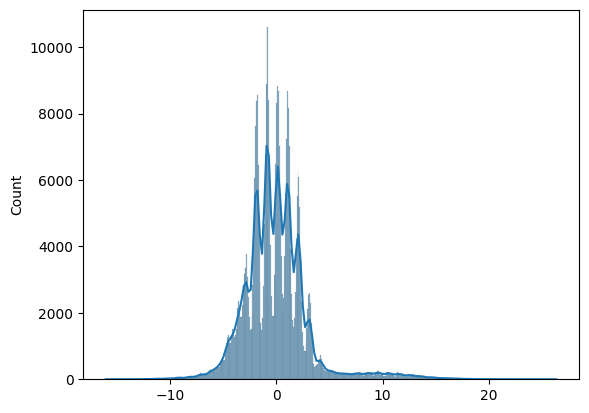

In [26]:
# Plot histogram of residuals
sns.histplot(residual, kde=True)

- The residuals have a close to normal distribution. The assumption of normality is satisfied.

*Checking the Linearity of Variables*

It states that the predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

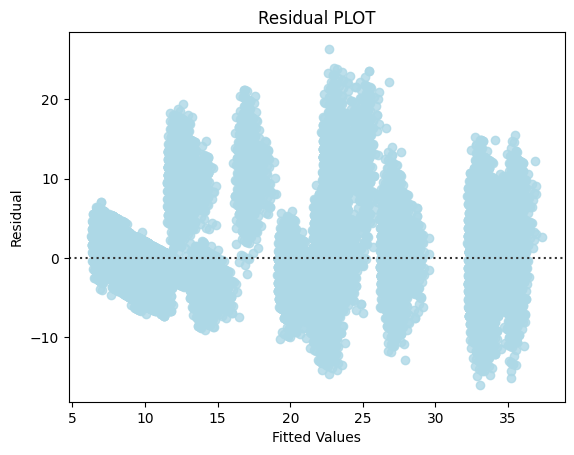

In [27]:
# Predicted values
fitted = olsmodel2.fittedvalues

# Plotting Residuals VS Fitted Values
sns.residplot(x = fitted, y = residual, color="lightblue")
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

- We can observe that there is no pattern in the residuals vs fitted values scatter plot, i.e., the linearity assumption is satisfied.

*Checking if there is No Heteroscedasticity*

* **Homoscedasticity:** If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* **Heteroscedasticity:** If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form an arrow shape or any other non-symmetrical shape.

* We will use `Goldfeld–Quandt` test to check homoscedasticity:

    * **Null hypothesis:** Residuals are homoscedastic

    * **Alternate hypothesis:** Residuals are hetroscedastic

    * **alpha = 0.05**

In [28]:
# Checking heteroscedasticity using lzip library

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residual, x_train2)
lzip(name, test)

[('F statistic', np.float64(1.0039167676254122)),
 ('p-value', np.float64(0.19105229128978796))]

**Observation:**

- As we can observe from the above test, the p-value is greater than 0.05. So, we fail to reject the null-hypothesis, i.e., residuals are homoscedastic.

All the assumptions for the linear regression model are satisfied. With our model's adjusted R-squared value of around 0.84, we can capture **84% of the variation** in the data.

The p-values for the independent variables are less than 0.05 in our final model, indicating that they are statistically significant toward Length of Stay (in days) prediction.

#### **Checking and interpreting model features**

In [29]:
# Displaying the parameters
coef = olsmodel2.params
coef

,0
const,1.988830e+01
Available Extra Rooms in Hospital,7.861126e-02
patientid,7.003175e-09
Admission_Deposit,-3.842683e-05
Department_anesthesia,6.082190e+00
Department_gynecology,4.627706e-01
Department_radiotherapy,-4.621757e+00
Department_surgery,9.685320e+00
Ward_Facility_Code_B,2.568800e-01
Ward_Facility_Code_C,4.350594e-01


In [30]:
# Let us write the equation of the model
Equation = "Stay (in days)="
print(Equation, end='\t')
for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

Stay (in days)=	( 19.888303568842094 ) *  const + ( 0.0786112582839752 ) *  Available Extra Rooms in Hospital + ( 7.003174925570516e-09 ) *  patientid + ( -3.842683153890652e-05 ) *  Admission_Deposit + ( 6.082189530242199 ) *  Department_anesthesia + ( 0.46277055274674744 ) *  Department_gynecology + ( -4.6217574243987665 ) *  Department_radiotherapy + ( 9.685320259575422 ) *  Department_surgery + ( 0.2568800346626406 ) *  Ward_Facility_Code_B + ( 0.4350594281427427 ) *  Ward_Facility_Code_C + ( 0.20320414851786453 ) *  Ward_Facility_Code_D + ( 0.3084998374761107 ) *  Ward_Facility_Code_E + ( 0.002686369566201748 ) *  Ward_Facility_Code_F + ( 7.262298385762855 ) *  doctor_name_Dr John + ( 1.194615852013519 ) *  doctor_name_Dr Mark + ( -0.21252602959391187 ) *  doctor_name_Dr Nathan + ( -0.3592478398038061 ) *  doctor_name_Dr Olivia + ( 1.2832985187434998 ) *  doctor_name_Dr Sam + ( 0.8183471665970047 ) *  doctor_name_Dr Sarah + ( 6.1592998102631995 ) *  doctor_name_Dr Simon + ( 0.2161

*Interpreting the Regression Coefficients*

* The Stay (in days) decreases with an increase in Department_radiotherapy. 1 unit increase in the Department_radiotherapy leads to a decrease of Stay (in days) ~ 4.62 times the Stay (in days) than the Department_TB&Chest_Disease that serves as a reference variable when everything else is constant.

* The Stay (in days) increases with an increase in Department_anesthesia. 1 unit increase in Department_anesthesia leads to an increase of Stay (in days) ~ 6.08 times the Stay (in days) than the Department_TB&Chest_Disease that serves as a reference variable when everything else is constant. This is understandable, as anesthesia is used in severe cases which results in more days of stay.

* The Stay (in days) increases with an increase in Department_surgery. 1 unit increase in Department_surgery leads to an increase of Stay (in days) ~ 9.68 times the Stay (in days) than the Department_TB&Chest_Disease that serves as a reference variable when everything else is constant. This is understandable, as surgery is conducted in severe cases which results in more days of stay.

* The Stay (in days) increases with an increase in doctor_name_Dr Simon. 1 unit increase in doctor_name_Dr Simon leads to an increase of Stay (in days) ~ 6.14 times the Stay (in days) than the doctor_name_Dr Isaac that serves as a reference variable when everything else is constant. This is understandable, as surgery cases are handled by Dr. Simon.

### **Part 5. Regularized Linear Regression Model Building**

#### **Linear Regression using sklearn Library**

*Training the Model*

In [21]:
# Initializing the Model
linearmodel = LinearRegression()

# Fitting the model
linearmodel.fit(x_train, y_train)

LinearRegression()

*Checking the Model's performance*

In [22]:
# Checking the performance on the training data
linear_reg_train = model_performance_regression(linearmodel, x_train, y_train)
linear_reg_train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.135093,2.146243,0.842813,0.842796,19.591828


In [23]:
# Checking the performance on the testing data
linear_reg_test = model_performance_regression(linearmodel, x_test, y_test)
linear_reg_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.144054,2.155765,0.843028,0.842962,19.676967


*Observations:*

- **The Root Mean Squared Error** and the **adjusted $R^2$** of train and test data are **very close**, indicating that **our model is not overfitting** to the training data.

- The adjusted $R^2$ of ~0.84 implies that the independent variables are able to explain ~84% variance in the target variable.

- Mean Absolute Error (MAE) indicates that the current model can predict LOS of patients within **mean error of 2.15 days** on the test data.

- The units of both RMSE and MAE are the same, i.e., days in this case. But RMSE is greater than MAE because it penalizes the outliers more.

- **Mean Absolute Percentage Error is ~19%** on the test data, indicating that the average difference between the predicted value and the actual value is ~19%.

#### **Ridge Regression**

**Ridge regression** is a sort of linear regression in which a **small amount of bias** is introduced to improve long-term predictions.

- Ridge regression is a regularization technique that is **used to reduce model complexity**. It's also known as **$L_2$ regularization**.

- The penalty term is added to the cost function in this technique. The amount of bias introduced into the model is referred to as the **Ridge Regression penalty**.

- We may compute it by multiplying the squared weight of each individual feature by the alpha.

- In general, Ridge Regression calculates the equation's parameters:

$$\Large\ \hat{y}\  = slope \times X + y\ intercept$$

By minimizing the:

$$\Large\ the\ sum\ of\ squared\ residuals + \alpha \times slope^{2} $$

- As we can see from the above equation, if the values of $\alpha$ tend to **zero**, the equation becomes the linear regression model's cost function. As a result, for the **minimum value of $\alpha$**, the model will be similar to the linear regression model.



*Ridge Regression with Default Parameters*

In [24]:
# Initializing Ridge Regression Model
ridge_model = Ridge()

# Fitting the model
ridge_model.fit(x_train, y_train)

Ridge()

In [25]:
# Checking the Performance of the model on the Test Dataset
ridge_reg = model_performance_regression(ridge_model, x_test, y_test)
ridge_reg

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.144057,2.155825,0.843028,0.842962,19.677968


- The performance metrics are showing almost similar results as compared to the Least Squares method.

*Ridge Regression with optimized $\large\alpha$*

In [26]:
# Optimizing Ridge Regression model parameters using GrirdSearchCV function
folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5,10,20]}
model = Ridge()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10,
                                   20]},
             return_train_score=True, scoring='r2')

In [27]:
# Getting optimized value for `alpha parameter`
model_cv.best_params_

{'alpha': 0.1}

In [28]:
# Training the tuned Ridge Regression model using the optimized alpha value
ridge_model_tuned = Ridge(alpha=0.1)
ridge_model_tuned.fit(x_train, y_train)

Ridge(alpha=0.1)

In [29]:
# Checking the Performance of the model on the Test Dataset
ridge_reg_tuned = model_performance_regression(ridge_model_tuned, x_test, y_test)
ridge_reg_tuned

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.144054,2.155771,0.843028,0.842962,19.677067


- After applying the Grid SearchCV, the optimized value of alpha results out to be 0.1.
- It can be observed that after tuning the parameters of Ridge Regression, the performance parameters does not change implying that Ridge Regression does not help in improving the model.

#### **Lasso Regression**

**Lasso regression** is another regularisation technique for reducing model complexity. It is an abbreviation for **Least Absolute and Selection Operator.**

- It is identical to Ridge Regression except that the **penalty term only contains absolute weights** rather than a square of weights.


- Because it uses absolute data, it **can decrease the slope to zero**, whereas **Ridge Regression can only get close to zero**.

- It is also known as **$L_1$ regularisation**.

Fundamentally, Lasso Regression calculates the equation's parameters:

$$\Large\ \hat{y}\  = slope \times X + y\ intercept$$

By minimizing the:

$$\Large\ the\ sum\ of\ squared\ residuals + \alpha \times |slope| $$

*Lasso Regression with Default Parameters*

In [30]:
# Initializing Lasso Regression Model
lasso_model = Lasso()

# Fitting the model
lasso_model.fit(x_train, y_train)

Lasso()

In [31]:
# Checking the Performance of the model on the Test Dataset
lasso_reg = model_performance_regression(lasso_model, x_test, y_test)
lasso_reg

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,6.064393,3.873381,0.415995,0.41575,34.653212


- After fitting the data into Lasso Regression Model with default value of alpha (=1), the performance metrics are showing poor results as compared to Least Squares method and Ridge Regression.
- We can tune the alpha to get the optimized value similar to Ridge Regression using Grid SearchCV.

*Lasso Regression with optimized $\large\alpha$*

In [32]:
# Optimizing Lasso Regression model parameters using GrirdSearchCV function
folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.01, 0.1, 0.2, 0.5, 0.9, 1, 5]}
model = Lasso()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 0.2, 0.5, 0.9, 1, 5]},
             return_train_score=True, scoring='r2')

In [33]:
# Getting optimized value for `alpha parameter`
model_cv.best_params_

{'alpha': 0.01}

In [35]:
# Training the tuned Ridge Regression model using the optimized alpha value
lasso_model_tuned = Lasso(alpha=0.01)
lasso_model_tuned.fit(x_train, y_train)

Lasso(alpha=0.01)

In [36]:
# Checking the Performance of the model on the Test Dataset
lasso_reg_tuned = model_performance_regression(lasso_model_tuned, x_test, y_test)
lasso_reg_tuned

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.152069,2.174085,0.842227,0.84216,19.987624


- After applying the Grid SearchCV, the optimized value of alpha results out to be 0.001.
- The performance metrics are showing similar results as compared to Least Squares method and Ridge Regression, implying that after adding the penalty, the model does not improve.

#### **Elastic Net Regression**

**Elastic Net** is a regularized regression model that combines $L_1$ and $L_2$ penalties, i.e., **lasso** and **ridge** regression. As a result, it performs a more efficient smoothing process.

- The elastic net includes the **penalty of lasso regression**, and **when used in isolation, it becomes the ridge regression**.
- In the procedure of regularization with an elastic net, **first, the coefficient of ridge regression is determined**.
- After this, a **lasso algorithm is performed on the ridge regression coefficient to shrink the coefficient**.
- It has two parameters to be set, $\large\alpha_1$ and $\large\alpha_2$ where $\large\alpha_1$ controls the $L_1$ penalty and $\large\alpha_2$ controls the $L_2$ penalty.

Instead of utilising two $\large\alpha$-parameters, we can use simply one $\large\alpha$ and one $L_1$-ratio-parameter, which sets the proportion of our $L_1$ penalty in relation to $\large\alpha$. If $\large\alpha = 1$ and $L_1$-ratio = 0.3, our $L_1$ penalty is multiplied by 0.3, and our $L_2$ penalty is multiplied by $1 - L_1-ratio = 0.7$.

$$\large{ElasticNetMSE = MSE(y,y_{pred}) + {\alpha \cdot (1 - L_1Ratio)} \sum_{i=1}^m{{|\theta_i|}+ {\alpha \cdot L_1Ratio} \sum_{i=1}^m{{|\theta_i|}}}}$$

*Elastic Net Regression with Default Parameters*

In [37]:
# Initializing Elastic Net Regression Model
from sklearn.linear_model import ElasticNet

elasticnet_model = ElasticNet()

# Fitting the model
elasticnet_model.fit(x_train, y_train)

ElasticNet()

In [38]:
# Checking the Performance of the model on the Test Dataset
elasticnet_reg = model_performance_regression(elasticnet_model, x_test, y_test)
elasticnet_reg

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,6.556247,4.678565,0.317422,0.317135,40.122614


- After fitting the data into Elastic Net Model with default value of alpha (=1) and l1_ratio, the performance metrics are showing poor results as compared to Least Squares method and Ridge Regression.
- We can tune the alpha to get the optimized value similar to Ridge Regression using Grid SearchCV.

*Elastic Net Regression using Optimized $\alpha$ and $L_1-ratio$*

In [39]:
# Optimizing Lasso Regression model parameters using GrirdSearchCV function
folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.01, 0.1, 0.5],
         'l1_ratio': [0.01, 0.02, 0.03, 0.05]}
model = ElasticNet()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.1, 0.5],
                         'l1_ratio': [0.01, 0.02, 0.03, 0.05]},
             return_train_score=True, scoring='r2')

In [40]:
# Getting optimized value for `alpha and L_1 parameters`
model_cv.best_params_

{'alpha': 0.01, 'l1_ratio': 0.05}

In [41]:
# Training the tuned Elastic Net Regression model using the optimized parameters
elasticnet_model_tuned = ElasticNet(alpha=0.01, l1_ratio=0.05)
elasticnet_model_tuned.fit(x_train, y_train)

ElasticNet(alpha=0.01, l1_ratio=0.05)

In [42]:
# Checking the Performance of the model on the Test Dataset
elasticnet_reg_tuned = model_performance_regression(elasticnet_model_tuned, x_test, y_test)
elasticnet_reg_tuned

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.285025,2.301427,0.828636,0.828564,21.585262


- After applying the Grid SearchCV, the optimized value of alpha results out to be 0.001, and l1_ratio = 0.05.
- The performance metrics are showing almost similar results as compared to Least Squares method, Ridge Regression and Lasso Regression, implying that after tuning the Elastic Net, the model does not improve.

#### **Comparison of Models**

In [43]:
# Creating a Dataframe showing model results
models= pd.concat([linear_reg_test,ridge_reg,ridge_reg_tuned,lasso_reg,lasso_reg_tuned,elasticnet_reg,
                   elasticnet_reg_tuned], axis=0) #combining all models into a single dataframe
models['Models'] = ['Least Squares', 'Ridge Regression', 'Ridge Regression Tuned', 'Lasso Regression',
                                      'Lasso Regression Tuned', 'Elastic Net Regression',
                    'Elastic Net Regression Tuned'] #adding names of the models as a column to the dataframe
models = models.iloc[:,[5, 0,1,2,3,4]] #ordering names of the models as the first column
models

,Models,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,Least Squares,3.144054,2.155765,0.843028,0.842962,19.676967
0,Ridge Regression,3.144057,2.155825,0.843028,0.842962,19.677968
0,Ridge Regression Tuned,3.144054,2.155771,0.843028,0.842962,19.677067
0,Lasso Regression,6.064393,3.873381,0.415995,0.415750,34.653212
0,Lasso Regression Tuned,3.152069,2.174085,0.842227,0.842160,19.987624
0,Elastic Net Regression,6.556247,4.678565,0.317422,0.317135,40.122614
0,Elastic Net Regression Tuned,3.285025,2.301427,0.828636,0.828564,21.585262


- As per the above result, the **Least Squares Method** is giving the best results as compared to other models.
- Regularization technique does not offer any significant improvement to the performance metrics.
- So, we will apply some **Non Linear models** to check if the model performance improves or not.

### **Summary**
- In this study, we have explored building Linear Regression models for this problem statement of predicting the likely length of stay of a patient for a hospital visit, and we've also identifies the most important features for the model, and trained the model using only those features, without compromising the model performance by much.

- However, being a linear model, it is more interpretable than a model with high predictive power. The performance metrics of our attempt at prediction can be improved with more complex and non-linear models.

- Moving forward, we can explore building models on more complex regularized versions of Linear Regression, and also get into non-linear tree-based regression models, to see if we can improve on the model's predictive performance.